In [7]:
# simple linear regression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [8]:
df = pd.read_csv("Advertising.csv")

In [9]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [11]:
df = df.drop(['Unnamed: 0'], axis=1)

In [12]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


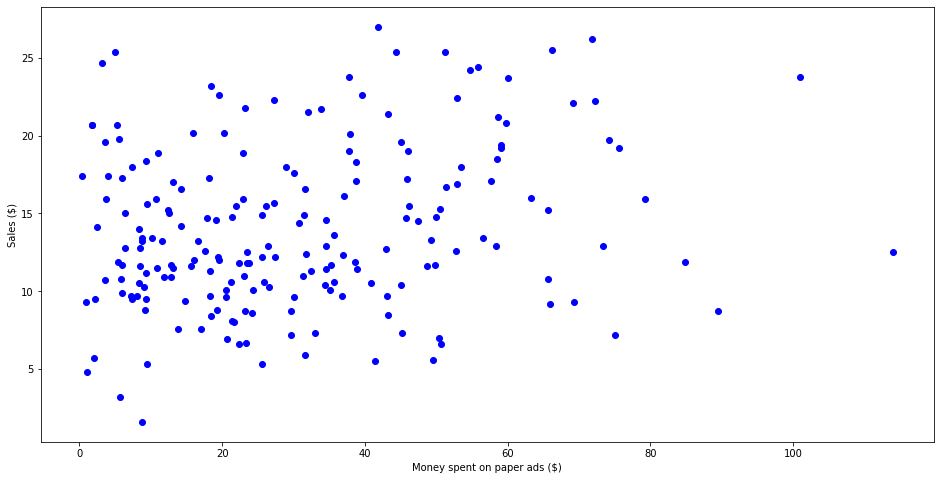

In [14]:
plt.figure(figsize=(16, 8))
plt.scatter(
    df['newspaper'],
    df['sales'],
    c='blue'
)
plt.xlabel("Money spent on paper ads ($)")
plt.ylabel("Sales ($)")
plt.show()

In [17]:
X = df['newspaper'].values.reshape(-1,1)
Y = df['sales'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
print("The linear model is: Y = {} + {}X".format(reg.intercept_[0], reg.coef_[0][0]))

The linear model is: Y = 12.35140706927816 + 0.05469309847227336X


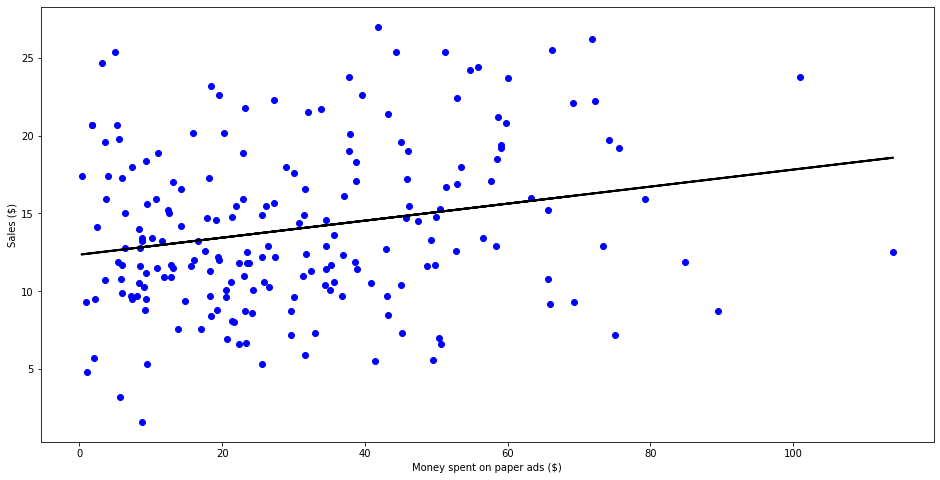

In [24]:
predictions = reg.predict(X)
plt.figure(figsize=(16, 8))
plt.scatter(df['newspaper'],df['sales'],
    c='blue'
)
plt.plot(df['newspaper'],predictions,
    c='black',
    linewidth=2
)
plt.xlabel("Money spent on paper ads ($)")
plt.ylabel("Sales ($)")
plt.show()

In [27]:
X2 = sm.add_constant(X)
estimation = sm.OLS(Y,X2)
estimation2 = estimation.fit()
print(estimation2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Fri, 22 Nov 2019   Prob (F-statistic):            0.00115
Time:                        13:56:43   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3514      0.621     19.876      0.0

In [28]:
print("Looking at both coefficients, we have a p-value that is very low (although it is probably not exactly 0). This means that there is a strong correlation between these coefficients and the target (Sales).Then, looking at the R² value, we have 0.052. Therefore, about 5% of the variability of sales is explained by the amount spent on News ads. This is okay, but definitely not the best we can to accurately predict the sales. Surely, spending on TV and radio ads must have a certain impact on sales.Let’s see if a multiple linear regression will perform better.")

Looking at both coefficients, we have a p-value that is very low (although it is probably not exactly 0). This means that there is a strong correlation between these coefficients and the target (Sales).Then, looking at the R² value, we have 0.052. Therefore, about 5% of the variability of sales is explained by the amount spent on News ads. This is okay, but definitely not the best we can to accurately predict the sales. Surely, spending on TV and radio ads must have a certain impact on sales.Let’s see if a multiple linear regression will perform better.


In [41]:
# multiple linear regression
df.head()
Xs = df.drop(['sales'], axis=1)
ys = df['sales'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(Xs,ys)

print("The linear model is: Y = {:.5} + {:.5}*TV + {:.5}*radio + {:.5}*newspaper".format(reg.intercept_[0], reg.coef_[0][0], reg.coef_[0][1], reg.coef_[0][2]))

The linear model is: Y = 2.9389 + 0.045765*TV + 0.18853*radio + -0.0010375*newspaper


In [43]:
X = np.column_stack((df['TV'], df['radio'], df['newspaper']))
y = df['sales']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 22 Nov 2019   Prob (F-statistic):           1.58e-96
Time:                        14:29:07   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

In [44]:
# As you can see, the R² is much higher than that of simple linear regression, with a value of 0.897!
# Also, the F-statistic is 570.3. This is much greater than 1, and since our data set if fairly small (only 200 data points), it demonstrates that there is a strong relationship between ad spending and sales.
# Finally, because we only have three predictors, we can consider their p-value to determine if they are relevant to the model or not. Of course, you notice that the third coefficient (the one for newspaper) has a large p-value. Therefore, ad spending on newspaper is not statistically significant. 